# AWS Lambda Function Permissions
This lesson explores permissions and security in your Lambda functions.

With Lambda functions, there are two sides that define the necessary scope of permissions – permission to invoke the function, and permission of the Lambda function itself to act upon other services. Because Lambda is fully integrated with AWS Identity and Access Management (IAM), you can control the exact actions of each side of the Lambda function.
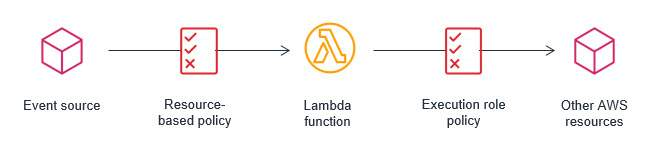

Permissions to invoke the function are controlled using an IAM resource-based policy. An IAM execution role defines the permissions that control what the function is allowed to do when interacting with other AWS services. Look at the full interaction of these two permission types and then explore each one in further detail.
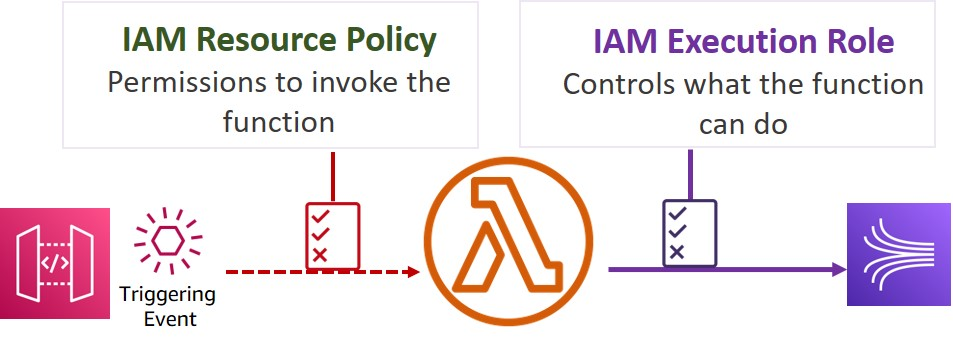
Resource policies grant permissions to invoke the function, whereas the execution role strictly controls what the function can to do within the other AWS service.

## Execution role

The execution role gives your function permissions to interact with other services. You provide this role when you create a function, and Lambda assumes the role when your function is invoked. The policy for this role defines the actions the role is allowed to take — for example, writing to a DynamoDB table. The role must include a trust policy that allows Lambda to “AssumeRole” so that it can take that action for another service. You can write the role or use the managed roles (with predefined permissions) provided by Lambda to simplify the process of creating an execution role. You can add or remove permissions from a function's execution role at any time, or configure your function to use a different role. 

Remember to use the principle of least privilege when creating IAM policies and roles. Always start with the most restrictive set of permissions and only grant further permissions as required for the function to run. Using the principle of least privilege ensures security in depth and eliminates the need to remember to 'go back and fix it' once the function is in production.
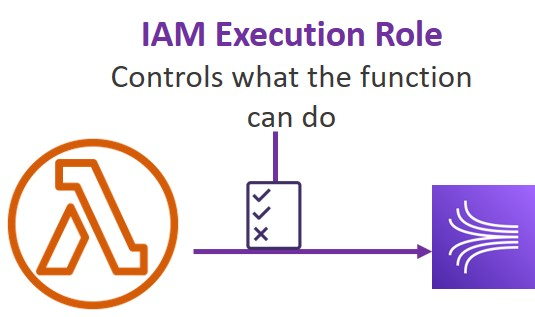

You can also use (opens in a new tab)IAM Access Analyzer to help identify the required permissions for the IAM execution role. IAM Access Analyzer reviews your AWS CloudTrail logs over the date range that you specify and generates a policy template with only the permissions that the function used during that time. For more information on IAM Access Analyzer

## Example: Execution role definitions

To learn more about each role policy, select the + symbol next to each category to see examples.

**IAM policy**

This IAM policy allows the function to perform the "Action": "dynamodb:PutItem" action against a DynamoDB table called "test" in the us-west-2 region.
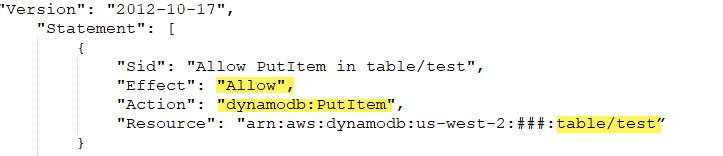

**Trust policy**

A trust policy defines what actions your role can assume. The trust policy allows Lambda to use the role's permissions by giving the service principal lambda.amazonaws.com permission to call the AWS Security Token Service (AWS STS) AssumeRole action.



This example illustrates that the principal "Service":"lambda.amazonaws.com" can take the "Action":"sts:AssumeRole" allowing Lambda to assume the role and invoke the function on your behalf.
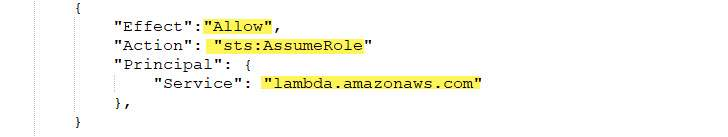

## Resource-based policy

A resource policy (also called a function policy) tells the Lambda service which principals have permission to invoke the Lambda function. An AWS principal may be a user, role, another AWS service, or another AWS account.
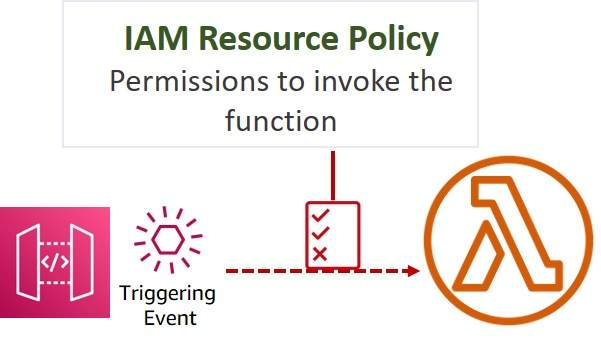

Resource policies make it easy to grant access to the Lambda function across separate AWS accounts. For example, if you need an S3 bucket in the production account to invoke your Lambda function in the Prod-2 account, you can create a new IAM role in Prod-2 and allow production to assume that role. Alternatively, you can include a resource-based policy that allows production to invoke the function in Prod-2. 

The resource-based policy is an easier option and you can see and modify it via the Lambda console. A consideration with cross-account permissions is that a resource policy does have a size limit. If you have many different accounts that need to invoke the function and you have to add permissions for each account via the resource policy, you might reach the policy size limit. In that case, you would need to use IAM roles instead of resource policies. 

## Policy comparison

Select each tab for a comparison between resource policies and execution roles.

**Resource-Based Policy**
Lambda resource-based (function) policy

- Associated with a "push" event source such as Amazon API Gateway
- Created when you add a trigger to a Lambda function
- Allows the event source to take the lambda:InvokeFunction action

**Execution Role**
IAM execution role

- Role selected or created when you create a Lambda function
- IAM policy includes actions you can take with the resource
- Trust policy that allows Lambda to AssumeRole
- Creator must have permission for iam:PassRole

## Distinct permissions for distinct purposes

The following example provides a simple analogy to highlight how these two different components handle Lambda permissions. Use the arrow keys to navigate through this example.

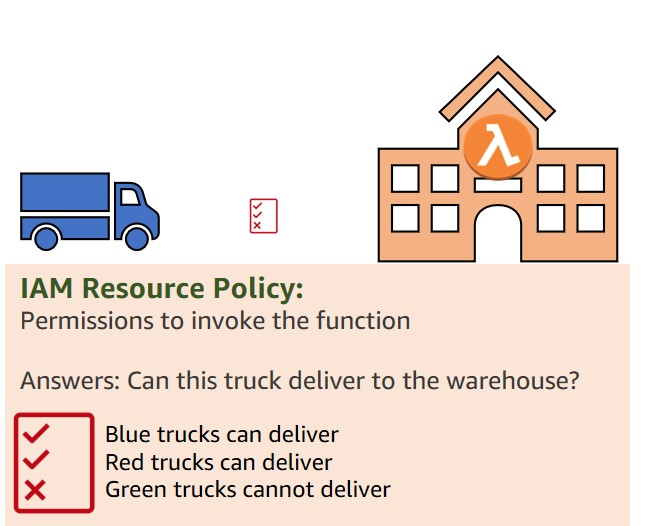

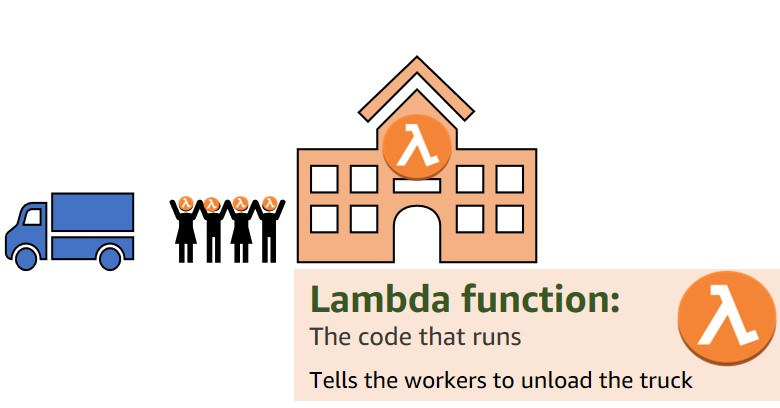

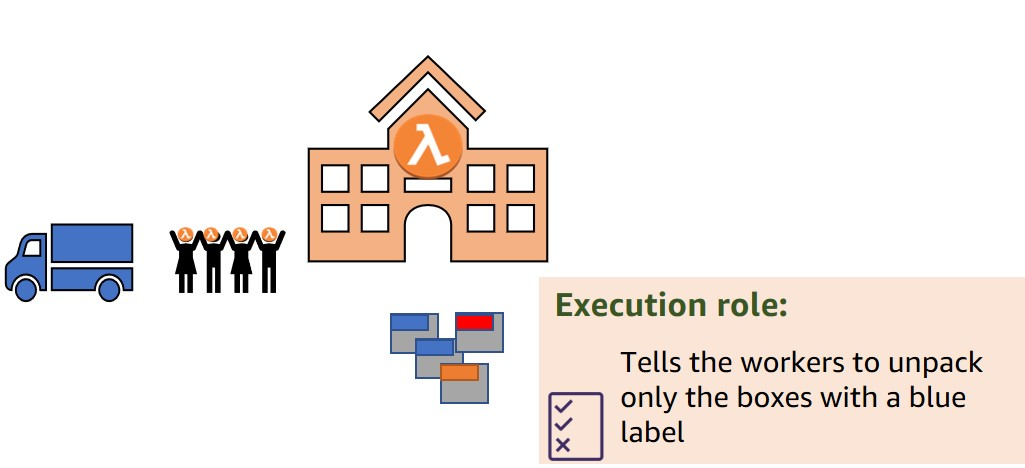

## Ease of management

For ease of policy management, you can use authoring tools such as the AWS Serverless Application Model (AWS SAM) to help manage your policies. For a Lambda function, AWS SAM scopes the permissions of your Lambda functions to the resources used by your application. You can add IAM policies as part of the AWS SAM template. The policies property can be the name of AWS managed policies, inline IAM policy documents, or AWS SAM policy templates. AWS SAM is discussed in more detail later in this course.

## Example resource policy

The following is a basic resource policy example.

- The policy has an Effect of "Allow". The Effect can be Deny or Allow.
- The Principal is the Amazon S3 "s3.amazonaws.com" service. This policy is allowing the Amazon S3 service to perform an Action.
- The Action that S3 is allowed to perform is the ability to invoke a Lambda function "lambda:InvokeFunction" called "my-s3-function".

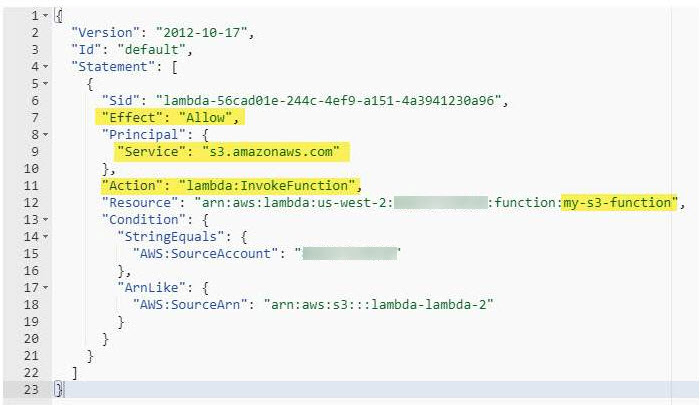

## Resource policies and execution roles on the AWS Lambda console

To learn more about the AWS Lambda console, select each hotspot on the following.

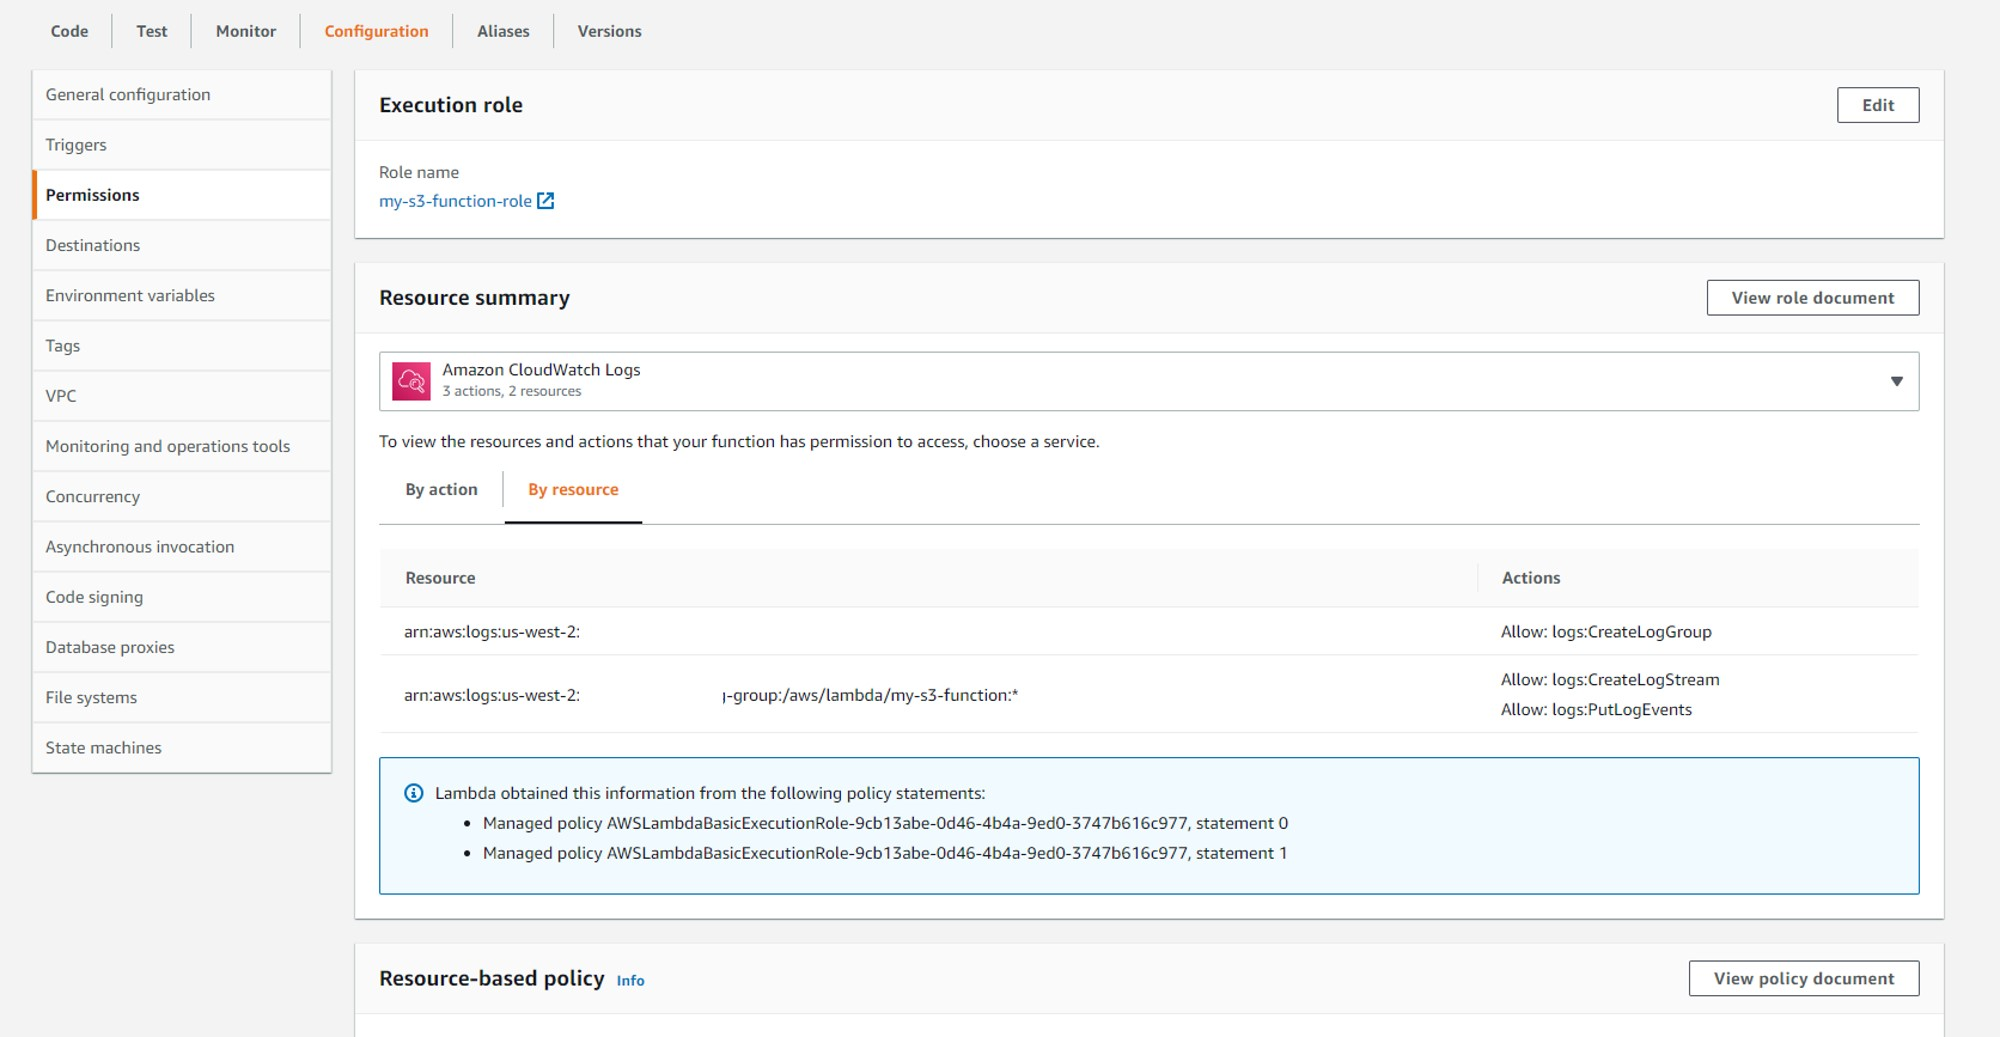

## Accessing resources in a VPC

Enabling your Lambda function to access resources inside your virtual private cloud (VPC) requires additional VPC-specific configuration information, such as VPC subnet IDs and security group IDs. This functionality allows Lambda to access resources in the VPC. It does not change how the function is secured. You also need an execution role with permissions to create, describe, and delete elastic network interfaces. Lambda provides a permissions policy for this purpose named "AWSLambdaVPCAccessExecutionRole".

## Lambda and AWS PrivateLink

To establish a private connection between your VPC and Lambda, create an interface VPC endpoint. Interface endpoints are powered by AWS PrivateLink, which enables you to privately access Lambda APIs without an internet gateway, NAT device, VPN connection, or AWS Direct Connect connection. 

Instances in your VPC don't need public IP addresses to communicate with Lambda APIs. Traffic between your VPC and Lambda does not leave the AWS network. 

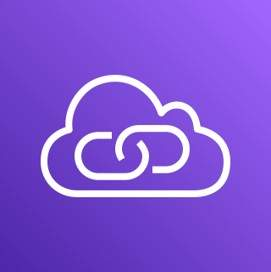


